In [1]:
#Importing the Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

##  1.Data Reading and Understanding

In [3]:
#Reading the data 
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Checking the data type and null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#Checking for Outliers 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores')

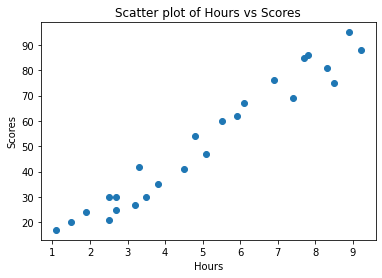

In [7]:
#Plotting Scatter Plot 
plt.scatter(data.Hours,data.Scores)
plt.title('Scatter plot of Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

We can see a clear linear relationship between the two 

## 2.Data Preparation

In [8]:
#Train-test split 
from sklearn.model_selection import train_test_split

In [9]:
#Splitting the data 
df_train,df_test = train_test_split(data,train_size=0.7,test_size=0.3,random_state=20)

In [10]:
#Rescaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars=['Hours','Scores']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [11]:
df_train.head()

,Hours,Scores
22,0.333333,0.230769
6,1.000000,0.910256
17,0.098765,0.089744
24,0.827160,0.884615
21,0.456790,0.474359


In [12]:
X_train = df_train.iloc[:, :-1].values  
y_train = df_train.iloc[:, 1].values  

In [13]:
X_train.shape

(17, 1)

## 3.Building the Model

In [14]:
#Building the model using Statsmodel 
import statsmodels 
import statsmodels.api as sm
import sklearn 


In [15]:
#Adding Intercept 
X_train_sm = sm.add_constant(X_train)

In [16]:
#Fitting the model 
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()

In [17]:
#Checking Parameters
lr_model.params

array([-0.048531  ,  1.01894541])

In [18]:
#Checking Summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     409.0
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           2.68e-12
Time:                        15:02:35   Log-Likelihood:                 21.879
No. Observations:                  17   AIC:                            -39.76
Df Residuals:                      15   BIC:                            -38.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0485      0.030     -1.614      0.127      -0.113       0.016
x1             1.0189      0.050     20.224      0.000       0.912       1.126
==============================================================================
Omnibus:                        1.712   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                1.204
Skew:                          -0.416   Prob(JB):                        0.548
Kurtosis:                       1.995   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Insights 
- p value is small for hours, hence our variable is significant
- Probability of F Statisitc is low, hence the overall model is also significant 

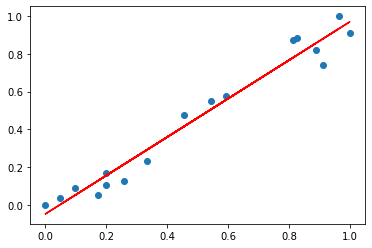

In [19]:
## Visualising the model

plt.scatter(X_train,y_train)
plt.plot(X_train,-0.048531+ 1.018945*X_train,'r')
plt.show()

## 4.Residual Analysis 

In [20]:
## we will perform this by comparing predicted and actual values of y train

In [21]:
y_train_pred = lr_model.predict(X_train_sm)

In [22]:
res= y_train-y_train_pred

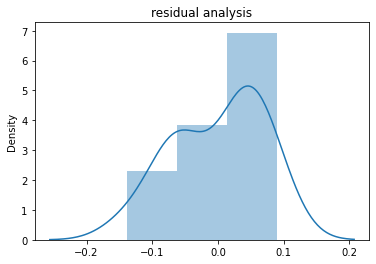

In [23]:
#Plotting the residual 

sns.distplot(res)
plt.title('residual analysis')
plt.show()

## 5.Making Predictions

In [24]:
#Applying the scaling to test 
num_vars=['Hours','Scores']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [25]:
#creating x and y
X_test = df_test.iloc[:, :-1].values  
y_test = df_test.iloc[:, 1].values  

In [26]:
X_test.shape

(8, 1)

In [27]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [28]:
y_test_pred=lr_model.predict(X_test_sm)

In [101]:
y_test_pred

array([0.7439821 , 0.68108423, 0.37917448, 0.25337875, 0.58044765,
       0.45465192, 0.22821961, 0.12758302])

In [29]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  
data


,Actual,Predicted
0,0.666667,0.743982
1,0.756410,0.681084
2,0.307692,0.379174
3,0.166667,0.253379
4,0.641026,0.580448
5,0.384615,0.454652
6,0.320513,0.228220
7,0.166667,0.127583


In [30]:
X_test.shape

(8, 1)

In [93]:
hours= np.array(9.25).reshape(1,1)


In [94]:
hours_sm = sm.add_constant(hours,has_constant='add')

In [95]:
hours_sm

array([[1.  , 9.25]])

In [108]:
own_pred = lr_model.predict(hours_sm)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]*10))

No of Hours = 9.25
Predicted Score = 93.76714078798909


## 6. Evaluating the Model

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error: 0.07160338752027537


In [34]:
from sklearn.metrics import r2_score

In [35]:
r2 = r2_score(y_true=y_test,y_pred=y_test_pred)

In [36]:
r2

0.8854976232318079

In [37]:
r2_1 = r2_score(y_true=y_train,y_pred=y_train_pred)

In [38]:
r2_1

0.9646241283293752

In [39]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     409.0
Date:                Fri, 25 Mar 2022   Prob (F-statistic):           2.68e-12
Time:                        15:02:50   Log-Likelihood:                 21.879
No. Observations:                  17   AIC:                            -39.76
Df Residuals:                      15   BIC:                            -38.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0485      0.030     -1.614      0.127      -0.113       0.016
x1             1.0189      0.050     20.224      0.000       0.912       1.126
==============================================================================
Omnibus:                        1.712   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                1.204
Skew:                          -0.416   Prob(JB):                        0.548
Kurtosis:                       1.995   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Inference 
Our training model explained 88% variance in dependent model, whereas our test model can do so by 96%. 